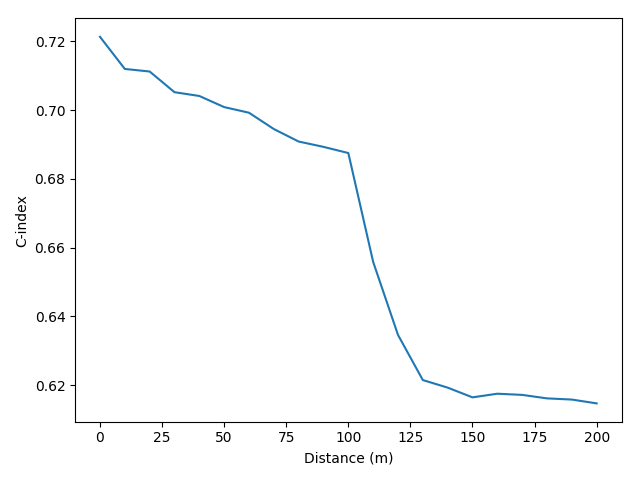

In [2]:
from numpy import genfromtxt
from scipy import stats
import math
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


# Calculate c-index
def c_index(true_labels, predictions):
    n = 0
    h_sum = 0
    for i in range(len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        for j in range(len(true_labels)):
            if j > i:
                nt = true_labels[j]
                np = predictions[j]
                if t != nt:
                    n = n + 1
                    if (p < np and t < nt) or (p > np and t > nt):
                        h_sum += 1
                    elif p == np:
                        h_sum += 0.5
    if n == 0:
        n = 1
    index = h_sum/n
    return index


def main():

    input_data = genfromtxt('INPUT.csv', delimiter=',')
    coordinates = genfromtxt('COORDINATES.csv', delimiter=',')
    output_data = genfromtxt('OUTPUT.csv', delimiter=',')
    
    # Z-score standardize the input data
    input_data = stats.zscore(input_data)

    c_indexes = []
    distances = []
    
    # For dead zone radiuses 0, 10, ..., 200
    for x in range(0, 201, 10):
        best_k = 0
        best_c = 0
        
        # For selected data, do knn with k-values 1, 3, 5, 7, 9
        for k in range(1, 10, 2):
            all_predictions = []
            
            # For every data point
            for i in range(len(input_data)):
                # The data that will be used (data points that are outside the distance)
                selected_data = []
                # Indexes of selected data points
                indexes = []
                
                # For every data point
                for s in range(len(input_data)):
                    # Calculate the distance between two data points
                    distance = math.hypot(coordinates[i][0] - coordinates[s][0], coordinates[i][1] - coordinates[s][1])
                    # If distance is over the limit, add it to the selected data and index to indexes
                    if distance > x:
                        selected_data.append(input_data[s])
                        indexes.append(s)
                        
                knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
                train_labels = []
                # Get train labels from output-data using indexes
                for index in indexes:
                    train_labels.append(output_data[index])
                knn.fit(selected_data, train_labels)
                prediction = knn.predict([input_data[i]])
                all_predictions.append(prediction)

            # Calculate the C-index
            c = c_index(output_data, all_predictions)
            # Update the best value of c and k if needed
            if c > best_c:
                best_c = c
                best_k = k
                
            # print("x:", x, ", k:", k, ", c:", c)
            
        c_indexes.append(best_c)
        distances.append(x)
        print("When distance is", x, "m,", "the best value of k = ", best_k, ", when c-index is", best_c)
        
    # Plot of the graph C-index vs. dead zone radius distance   
    plt.plot(distances, c_indexes)
    plt.ylabel('C-index')
    plt.xlabel('Distance (m)')
    plt.show()
         
                
main()


When distance is 0 m, the best value of k =  9 , when c-index is 0.7212936896024101
When distance is 10 m, the best value of k =  9 , when c-index is 0.7119527556630069
When distance is 20 m, the best value of k =  9 , when c-index is 0.7112038010496564
When distance is 30 m, the best value of k =  9 , when c-index is 0.7051880156062542
When distance is 40 m, the best value of k =  9 , when c-index is 0.7040880322652447
When distance is 50 m, the best value of k =  9 , when c-index is 0.7008556281489342
When distance is 60 m, the best value of k =  9 , when c-index is 0.6992156275329715
When distance is 70 m, the best value of k =  9 , when c-index is 0.6944713150383087
When distance is 80 m, the best value of k =  9 , when c-index is 0.6908325855453159
When distance is 90 m, the best value of k =  7 , when c-index is 0.68928427937267
When distance is 100 m, the best value of k =  7 , when c-index is 0.6874860883430464
When distance is 110 m, the best value of k =  7 , when c-index is 